In [1]:
import geopandas
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [2]:
fire_facilities_data = {
    'facility_id' : [1, 2, 3, 4],
    'type' : ['소화전', '소화전', '비상벨', '비상벨'],
    'lat' : [37.513, 37.502, 37.520, 37.490],
    'lon' : [127.050, 127.015, 127.060, 127.020],
    'capacity' : [1500, 1500, None, None],
    'install_date' : ['2020-01-15', '2019-03-20', '2021-07-01', '2022-02-10']

}

In [3]:
df_fire_facilities = pd.DataFrame(fire_facilities_data)
geometry_fire = [Point(xy) for xy in zip(df_fire_facilities['lon'], df_fire_facilities['lat'])]
gdf_fire_facilities = geopandas.GeoDataFrame(df_fire_facilities, geometry=geometry_fire, crs="EPSG:4326")

print("소방시설물 GeoDataFrame:")
print(gdf_fire_facilities.head())

소방시설물 GeoDataFrame:
   facility_id type     lat      lon  capacity install_date  \
0            1  소화전  37.513  127.050    1500.0   2020-01-15   
1            2  소화전  37.502  127.015    1500.0   2019-03-20   
2            3  비상벨  37.520  127.060       NaN   2021-07-01   
3            4  비상벨  37.490  127.020       NaN   2022-02-10   

                 geometry  
0   POINT (127.05 37.513)  
1  POINT (127.015 37.502)  
2    POINT (127.06 37.52)  
3    POINT (127.02 37.49)  


In [4]:
vulnerable_facilities_data = {
    'vulnerable_id' : [101, 102, 103],
    'name' : ['행복요양원', '미래유치원', '새희망병원'],
    'lat' : [37.510, 37.505, 37.498],
    'lon' : [127.045, 127.010, 127.030],
    'capacity_person' : [80, 50, 200],
}

In [5]:
df_vulnerable_facilities = pd.DataFrame(vulnerable_facilities_data)
geometry_vul = [Point(xy) for xy in zip(df_vulnerable_facilities['lon'], df_vulnerable_facilities['lat'])]
gdf_vulnerable_facilities = geopandas.GeoDataFrame(df_vulnerable_facilities, geometry=geometry_vul, crs="EPSG:4326")

print("\n재난 취약 시설물 GeoDataFrame:")
print(gdf_vulnerable_facilities.head())


재난 취약 시설물 GeoDataFrame:
   vulnerable_id   name     lat      lon  capacity_person  \
0            101  행복요양원  37.510  127.045               80   
1            102  미래유치원  37.505  127.010               50   
2            103  새희망병원  37.498  127.030              200   

                geometry  
0  POINT (127.045 37.51)  
1  POINT (127.01 37.505)  
2  POINT (127.03 37.498)  


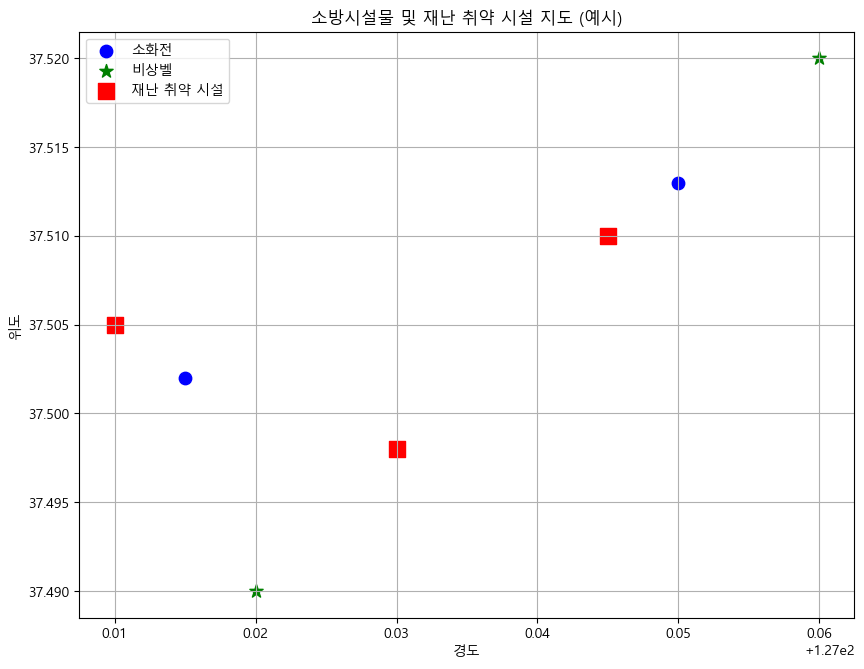

In [10]:
fig, ax = plt.subplots(1,1, figsize=(10,10))

gdf_fire_facilities[gdf_fire_facilities['type'] == '소화전'].plot(ax=ax, color='blue', marker='o', label='소화전', markersize=80)
gdf_fire_facilities[gdf_fire_facilities['type'] == '비상벨'].plot(ax=ax, color='green', marker='*', label='비상벨', markersize=100)
gdf_vulnerable_facilities.plot(ax=ax, color='red', marker='s', label='재난 취약 시설', markersize=120)

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

plt.title("소방시설물 및 재난 취약 시설 지도 (예시)")
plt.xlabel("경도")
plt.ylabel("위도")

plt.legend()
plt.grid(True)
plt.show()

In [7]:
hydrant = gdf_fire_facilities[gdf_fire_facilities['type'] == '소화전']
print("\n소화전 정보:")
print(hydrant)


소화전 정보:
   facility_id type     lat      lon  capacity install_date  \
0            1  소화전  37.513  127.050    1500.0   2020-01-15   
1            2  소화전  37.502  127.015    1500.0   2019-03-20   

                 geometry  
0   POINT (127.05 37.513)  
1  POINT (127.015 37.502)  
